# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lalu Habib Satya Wiguna
- **Email:** satyawiguna102@gmail.com
- **ID Dicoding:** habibsatya

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?
- Apa perbedaan pola penyewaan sepeda berdasarkan hari libur, hari kerja dan akhir pekan?
- Bagaimana pengaruh musim terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Dari output di atas, kita memiliki 731 data harian penyewa yang terdapat pada 16 kolom untuk dataset Bike Sharing (day). Berdasarkan informasi dari situs [kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset), variabel-variabel pada dataset Bike Sharing sebagai berikut:
- instant: nomor urut dari setiap kolom pada dataset
- dteday: tanggal transaksi
- season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 sampai 12)
- holiday: menunjukkan apakah hari tersebut merupakan hari libur (holiday) atau bukan
- weekday: hari dalam seminggu, yang menunjukkan urutan hari (0 sampai 6)
- workingday: jika hari bukan akhir pekan atau hari libur maka 1, sebaliknya adalah 0
- weathersit: cuaca (1: cerah, 2: berkabut, 3: hujan ringan, 4: hujan lebat)
- temp: suhu yang dinormalisasi ke dalam skala Celcius
- atemp: suhu rasa (feeling temperature) yang dinormalisasi ke dalam skala celcius
- hum: kelembapan yang dinormalisasi, diperoleh dengan membagi nilai kelembapan aktual dengan 100 (nilai maksimum)
- windspeed: kecepatan angin yang dinormalisasi,  diperoleh dengan membagi nilai kecepatan angin aktual dengan 67 (nilai maksimum)
- casual: jumlah pengguna kasual, yaitu pengguna yang menggunakan layanan penyewaan sepeda tanpa berlangganan atau tanpa memiliki keanggotaan resmi
- registered: jumlah pengguna terdaftar, yaitu pengguna yang memiliki keanggotaan resmi (member) atau berlangganan layanan penyewaan sepeda
- cnt: jumlah total penyewaan sepeda, mencakup gabungan antara pengguna kasual dan pengguna terdaftar

### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   dteday       731 non-null    object 
 2   season       731 non-null    int64  
 3   yr           731 non-null    int64  
 4   mnth         731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temp         731 non-null    float64
 10  atemp        731 non-null    float64
 11  hum          731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  cnt          731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output di atas, dapat dilihat bahwa:
- Terdapat 1 kolom dengan tipe object, yaitu: dteday  
- Terdapat 11 kolom dengan tipe int64, yaitu: instant, season, yr, mnth, holiday, weekday, workingday, weathersit, casual, registered, cnt
- Terdapat 4 kolom dengan tipe float64, yaitu: temp, atemp, hum, windspeed

In [4]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval - dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

Dari output di atas kita tidak melihat informasi statistik untuk kolom 'dteday'. Hal tersebut terjadi karena data pada kolom 'dteday' bernilai String sedangkan fungsi describe hanya dapat memproses data yang bernilai integer.

In [5]:
# Melihat apa saja kolom kategorikal & numerik berdasarkan data unik pada kolom

for x in list(day_df):
    print(f"{x} = {day_df[x].nunique()}")

instant  = 731
dteday      = 731
season  = 4
yr  = 2
mnth  = 12
holiday  = 2
weekday  = 7
workingday  = 2
weathersit  = 3
temp       = 499
atemp      = 690
hum       = 595
windspeed  = 650
casual  = 606
registered  = 679
cnt = 696


Berdasarkan output di atas, dapat dikelompokkan kolom kategorikal dan numerik berdasarkan keunikan data pada kolomnya sebagai berikut.
Kolom kategorikal:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

Kolom numerik:
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

Kemudian ada beberapa kolom yang akan dibuang pada proses data cleaning yaitu instant dan dteday.

### Cleaning Data

#### Replace Columns Name

Pada tahap ini, kita akan mengubah nama dari beberapa kolom yang sebelumnya terdapat blank space pada penulisannya yang membuat penulisan kode tidak efektif. Berikut merupakan list dari nama kolom dan lihat ada beberapa kolom yang memiliki spasi kosong di belakang namanya.

In [6]:
list(day_df)

['instant ',
 'dteday     ',
 'season ',
 'yr ',
 'mnth ',
 'holiday ',
 'weekday ',
 'workingday ',
 'weathersit ',
 'temp      ',
 'atemp     ',
 'hum      ',
 'windspeed ',
 'casual ',
 'registered ',
 'cnt']

In [7]:
day_df.columns = [
    'instant',
    'dteday',
    'season',
    'yr',
    'mnth',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'casual',
    'registered',
    'cnt'
]

Berikut merupakan nama kolom setelah dilakukan perubahan:

In [8]:
list(day_df)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

#### Handling Duplicated Data
Pada tahap ini kita akan memeriksa apakah ada data duplikat pada dataset yang kita gunakan. Jika ada maka kita perlu untuk menghapusnya agar tidak boros informasi serta mengurangi kemungkinan overfitting.

In [9]:
day_df.duplicated().sum()

# Tidak ada data duplikat, jadi aman

np.int64(0)

#### Handling Missing Value
Pada tahap ini kita perlu memastikan apakah ada nilai yang bernilai kosong pada dataset kita karena akan memiliki pengaruh pada proses analisis nanti jika data kita memiliki informasi yang kurang.

In [10]:
# Melihat apakah ada data yang bernilai kosong

day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan data statistik di atas diketahui bahwa terdapat 731 hari penyewaan sepeda oleh pelanggan selama 2 tahun. Berikut rangkuman parameter statistik dari data tersebut:
- Sebagian besar penyewaan sepeda terjadi pada musim panas (kategori 2 pada kolom 'season': musim panas).
- Rata-rata bulan penyewaan berada di sekitar bulan Juni (kategori 6 pada kolom 'mnth': bulan Juni) atau pertengahan tahun.
- Untuk hari libur penyewaan kurang diminati hanya berkisar 0.3% dari keseluruhan data, berbanding terbalik dengan hari kerja yang mana sebagian besar penyewaan sepeda terjadi di hari kerja dengan persentase 68%.
- Hari Rabu (kategori 3 pada kolom 'weekday': hari Rabu) merupakan rata-rata terjadinya penyewaan sepeda oleh pelanggan di setiap minggunya.
- Cuaca berpengaruh besar terhadap penyewaan sepeda, di mana rata-rata penyewaan terjadi pada saat cuaca cerah (kategori 1 pada kolom 'weathersit': cuaca cerah).
- Rata-rata penyewaan harian adalah 4504 sepeda.
- Pengguna yang terdaftar (member) lebih banyak melakukan penyewaan dengan rata-rata 3656 per harinya dibandingkan dengan pengguna kasual dengan rata-rata 848 per hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

Tahap pertama yang dilakukan adalah mengubah nilai normalisasi pada kolom 'temp' ke dalam nilai aktual suhu dalam celcius (°C). Kemudian membuat sebuah kolom baru dengan nama 'temp_actual' yang menyimpan nilai aktual dari suhu yang telah dinormalisasi. Hal ini dilakukan untuk mempermudah proses analisis dengan menggunakan nilai aktual dari suhu tersebut. Berdasarkan dokumentasi pada dataset Bike Sharing ini, didapatkan nilai t_min (suhu minimum) = -8 dan t_max (suhu maksimum) = 39. Kemudian rumus yang digunakan sebagai berikut:
$$
temp = temp \times ({t_{max} - t_{min}}) + t_{min}
$$

In [12]:
t_min = -8 
t_max = 39
day_df['temp_actual'] = day_df['temp'] * (t_max - t_min) + t_min
day_df.insert(day_df.columns.get_loc('temp') + 1, 'temp_actual', day_df.pop('temp_actual'))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,temp_actual,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,8.175849,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,9.083466,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,1.229108,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,1.400000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,2.666979,0.229270,0.436957,0.186900,82,1518,1600


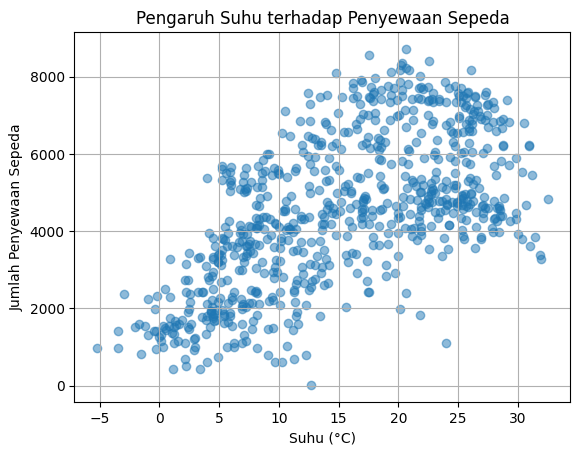

In [24]:
plt.scatter(day_df['temp_actual'], day_df['cnt'], alpha=0.5)
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid()
plt.show()

Berdasarkan data di atas, didapatkan insight sebagai berikut:
- Terdapat pola hubungan positif antara suhu udara dan jumlah penyewaan sepeda. Ketika suhu meningkat, jumlah penyewaan sepeda cenderung bertambah hingga titik tertentu.

- Aktivitas penyewaan sepeda tampaknya mencapai puncaknya pada suhu sekitar 20–25°C. Setelah suhu melewati angka tersebut, jumlah penyewaan mulai stabil atau bahkan sedikit menurun.

- Pada suhu sangat rendah (di bawah 5°C) atau sangat tinggi (di atas 30°C), jumlah penyewaan cenderung lebih sedikit. Ini mungkin disebabkan oleh ketidaknyamanan bersepeda dalam kondisi tersebut.

- Terdapat cukup banyak penyebaran data pada suhu tertentu, yang menunjukkan bahwa faktor lain mungkin memengaruhi jumlah penyewaan sepeda selain suhu, seperti hari kerja, cuaca, atau musim.

### Pertanyaan 2: Apa perbedaan pola penyewaan sepeda berdasarkan hari libur, hari kerja dan akhir pekan?

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2